# Semana Exploratory Data Analysis (EDA)

# Problema

- Uma escola necessita trabalhar com filmes em seu planejamento pedagógico.
- Ela necessita de visualizar as notas de diversos filmes em suas diversas categorias.
- Os filmes devem atravessar gerações.


# Ambientação Python

In [6]:
# comentário de uma linha
"""
  comentário de múltiplas linhas
"""
from datetime import datetime as dt
agora = dt.now()
agora_formatada = agora.strftime("%d/%m/%Y %H:%M:%S")
print("Hello EDA")
msg = input("Como será essa semana EDA?")
print(f"será: {msg} - {agora_formatada}")

Hello EDA
será: fe - 20/08/2024 15:33:22


## Características Python

- Multiplataforma
- DC e IA
- Identação
- Tipagem Dinâmica
- Bibliotecas
- Paradigma Funcional (lambda) 
- Paradigma Orientação a Objetos
- Paradigma Estruturado
- Microserviços

### Exemplo Orientado a Objetos

In [10]:
class Pessoa():
    def __init__(self,nome,idade):
        self.nome = nome
        self.idade = idade
    def pega_nome(self):
        return self.nome
    def dobro_idade(self):
        return self.idade * 2

In [12]:
pessoa = Pessoa("joao",15)
pessoa.pega_nome()

'joao'

### Exemplo Funcional (lambda)

In [ ]:
# instalar o numpy
! pip install numpy

  Using cached numpy-2.1.0-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.1.0-cp312-cp312-win_amd64.whl (12.6 MB)


In [ ]:
# instalar o pandas
! pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


Pra entender melhor!
- Sem lambda como seria?

def dobro(self,x):
   return x * 2

In [21]:
# definindo um lambda
dobro = lambda x:x*2

Criar uma matriz 4x3


In [13]:
import numpy as np
matriz_4x4 = np.array([[1, 2, 3, 4],
                       [2, 4, 6, 8],
                       [3, 8, 12, 16],
                       [4, 16, 24, 32]])

In [14]:
matriz_4x4

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  8, 12, 16],
       [ 4, 16, 24, 32]])

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(matriz_4x4)

In [19]:
df.head()

,0,1,2,3
0,1,2,3,4
1,2,4,6,8
2,3,8,12,16
3,4,16,24,32


In [22]:
df_dobrado = df.apply(dobro)

In [23]:
df_dobrado.head()

,0,1,2,3
0,2,4,6,8
1,4,8,12,16
2,6,16,24,32
3,8,32,48,64


# Iniciando nosso primeiro EDA

## Solução - Melhores Filmes para a Escola

### Importando o DataSet

In [24]:
df_filmes = pd.read_csv('datasets/ratings.csv')

### Mostrando os cinco primeiros

In [25]:
df_filmes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Mostrando todas as colunas

In [26]:
df_filmes.columns = ['usuario_id','filme_id','avaliacao','quando']

In [27]:
df_filmes.head()

,usuario_id,filme_id,avaliacao,quando
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Mostrar uma SERIES

In [29]:
df_filmes['avaliacao']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: avaliacao, Length: 100836, dtype: float64

### Uma forma mais sintática

In [30]:
df_filmes.avaliacao

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: avaliacao, Length: 100836, dtype: float64

### Dúvida , mas o que realmente é uma SERIES?

https://dataat.github.io/introducao-analise-de-dados-espaciais/python.html

### Nossa primeira EDA (analisar a quantidade de filmes por avaliações)

In [31]:
df_filmes.value_counts()

usuario_id  filme_id  avaliacao  quando    
610         170875    3.0        1493846415    1
1           1         4.0        964982703     1
            3         4.0        964981247     1
            6         4.0        964982224     1
610         160080    3.0        1493848031    1
                                              ..
1           151       5.0        964984041     1
            110       4.0        964982176     1
            101       5.0        964980868     1
            70        3.0        964982400     1
            50        5.0        964982931     1
Name: count, Length: 100836, dtype: int64

In [32]:
df_filmes.avaliacao.value_counts()

avaliacao
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

### A média de todas as notas

In [33]:
df_filmes.avaliacao.mean()

np.float64(3.501556983616962)

### Mostrar valores únicos?

In [34]:
df_filmes.avaliacao.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

### Contando histórias com Histogramas

In [35]:
! pip install matplotlib

In [36]:
! pip install seaborn

### Contar a história da quantidade de filmes por avaliações

<Axes: ylabel='Frequency'>

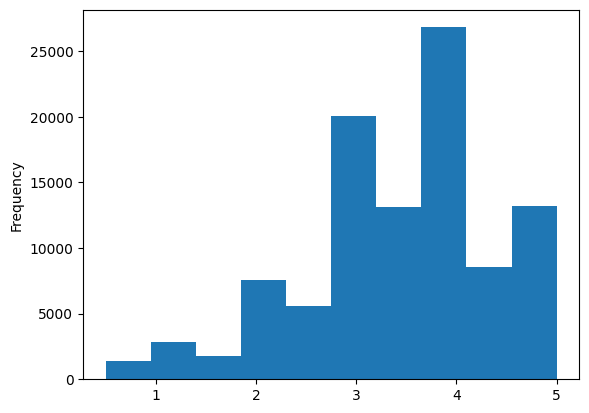

In [37]:
df_filmes.avaliacao.plot(kind='hist')

# Estatística Descritiva

In [38]:
df_filmes

,usuario_id,filme_id,avaliacao,quando
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [43]:
# calculando a média
print(f" a média de avaliações é: {df_filmes.avaliacao.mean():.2f}")

 a média de avaliações é: 3.50


In [41]:
# calculando a mediana
print(f" a mediana de avaliações é: {df_filmes.avaliacao.median()}")

 a mediana de avaliações é: 3.5


In [44]:
#calcuando a soma

print(f" a soma de avaliações é: {df_filmes.avaliacao.sum()}")

 a soma de avaliações é: 353083.0


# Mediana 
-- 

In [45]:
df_filmes.avaliacao.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: avaliacao, dtype: float64

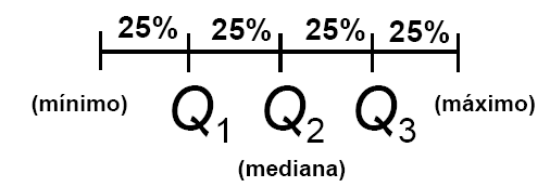

# Importando Seaborn

In [46]:
import seaborn as sns

In [47]:
# criando variável
notas = df_filmes.avaliacao

In [48]:
# mostrando o cabeçalho
notas.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: avaliacao, dtype: float64

<Axes: ylabel='avaliacao'>

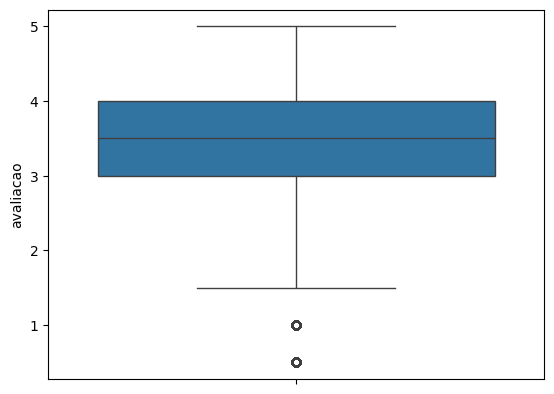

In [49]:
sns.boxplot(notas)

<Axes: xlabel='avaliacao'>

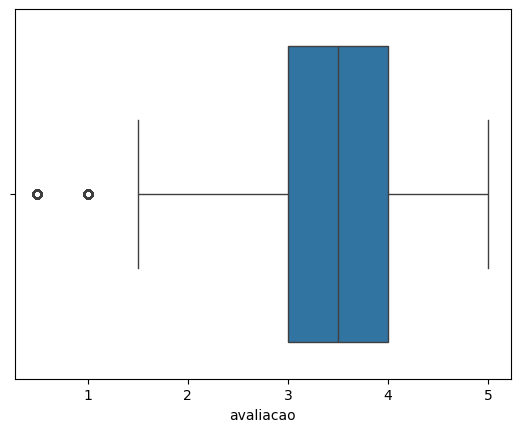

In [50]:
sns.boxplot(x=notas)

# Conclusão

- Gráfico Boxplot ou Caixa
- O objetivo dele é mostrar a mediana e os quartis 

# Dataset movies.csv

In [51]:
df_filmes_todos = pd.read_csv('datasets/movies.csv')

In [52]:
df_filmes_todos.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
df_filmes_todos.columns = ['filme_id','titulo','genero']

In [54]:
df_filmes_todos.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
df_filmes_todos.query("filme_id == 1")

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [59]:
df_filmes_todos.query("filme_id == 1")

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [60]:
df_filmes.query("filme_id == 1").avaliacao

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: avaliacao, Length: 215, dtype: float64

# Médias por Filme (groupby())

Como agrupar por filmes, e calcular as médias de uma só vez

In [69]:
medias_por_filme = df_filmes.groupby('filme_id').mean()['avaliacao']

In [70]:
medias_por_filme.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: avaliacao, dtype: float64

<Axes: ylabel='Frequency'>

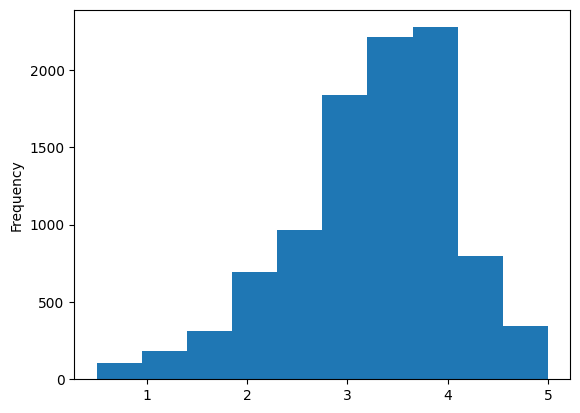

In [71]:
medias_por_filme.plot(kind='hist')

# Boxplot

<Axes: xlabel='avaliacao'>

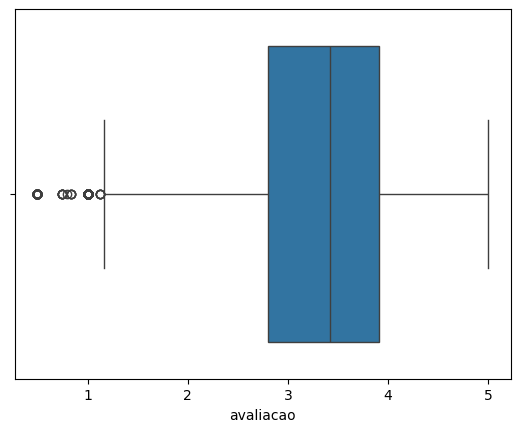

In [72]:
sns.boxplot(x=medias_por_filme)

In [73]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: avaliacao, dtype: float64

<Axes: xlabel='avaliacao', ylabel='Count'>

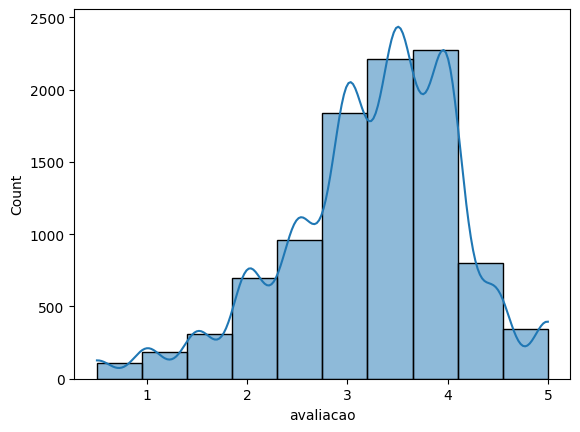

In [79]:
sns.histplot(medias_por_filme,kde=True,bins=10)

# Matplotlib

Text(0.5, 1.0, 'Contando uma História dos Filmes')

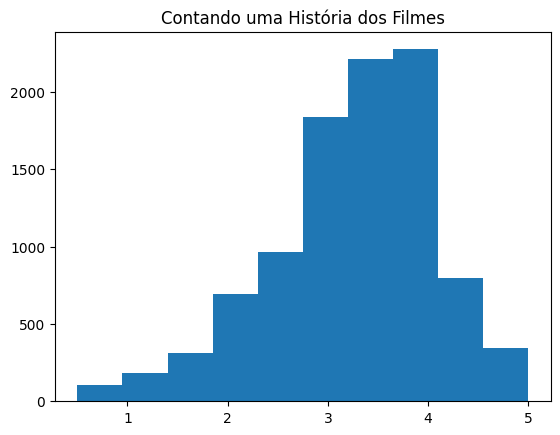

In [81]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Contando uma História dos Filmes")